In [1]:
import pandas as pd

url="./Phishing.csv"
df=pd.read_csv(url)

In [2]:
# Change result instances of -1 to 0
#df['Result'].values[df['Result'].values < 0] = 0

# Change all instances of -1 to 0
df.values[df.values < 0] = 0

In [3]:
# Get Row with a missing value
null_data = df[df.isnull().any(axis=1)]
null_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [4]:
from sklearn.impute import SimpleImputer

# Use mean value for any nan values
df.fillna(df.mean(), inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

# split data up into training and test data
x = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
import numpy as np

# Fix the random seed
np.random.seed(7)

# Serialize the numpy arrays
np.save("X_train.npy", x_train), np.save("y_train.npy", y_train)
np.save("X_test.npy", x_train), np.save("y_test.npy", y_train)

(None, None)

In [7]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
from sklearn.metrics import precision_recall_fscore_support

t = precision_recall_fscore_support(y_test, logisticRegr.predict(x_test), average='micro')
t

(0.9163274536408865, 0.9163274536408865, 0.9163274536408865, None)

In [13]:
from sklearn import metrics

y_pred=logisticRegr.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 854,  102],
       [  83, 1172]])

In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

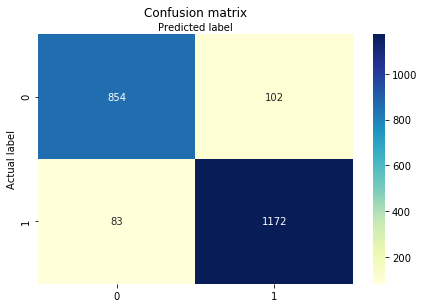

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9163274536408865
Precision: 0.9199372056514914
Recall: 0.9338645418326693


From the above classification report, we can see that the model is able to detect 91.6% of phishing websites with 91.9% precision.